<h1><center>Continuous Integration for Data Scientsts</center></h1>
<h2><center>by Jaidev Deshpande</center></h2>
<h3><center>Data Scientist @ Cube26 Software Pvt Ltd</center></h3>

<div style="text-align: center">
<div id="social">
<div id="social_twitter">
    <a href="http://twitter.com/jaidevd"><img src="images/twitter-128.png" width="32" height="32">
    </a>
</div>
<div id="social_medium">
    <a href="http://medium.com/@jaidevd"><img src="images/medium.ico" width="32" height="32"></a>
</div>
<div id="social_github">
    <a href="http://github.com/jaidevd"><img src="images/mark-github-128.png" width="32" height="32"></a>
</div>
</div>
</div>

<div style="text-align: center"><font size="4"><strong>@jaidevd</strong></font></div>

# Regression & Linear Systems
## Overdetermined System of Equations

$Ax = b \mid A \in I\!R^{m \times n} \mid m > n$ 

## Overdetermined system == Least Squares Minimization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import lstsq
from scipy.fftpack import dct, idct
from sklearn.linear_model import LinearRegression, Lasso

(<matplotlib.axes._subplots.AxesSubplot at 0x10d3517d0>,
 <matplotlib.legend.Legend at 0x10f887950>)

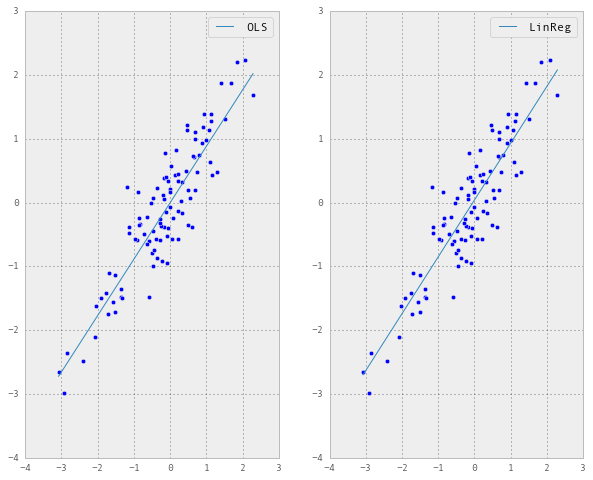

In [2]:
A = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], size=(100,))
X = A[:, 0].reshape(-1, 1)
y = A[:, 1].reshape(-1, 1)
x_ls = np.linalg.lstsq(X, y)[0]
lr = LinearRegression().fit(X, y)
x_lr = lr.coef_

xx = np.linspace(X.min(), X.max(), 100)
yy_ls = xx * x_ls
yy_lr = lr.predict(xx.reshape(-1, 1))

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.scatter(X.ravel(), y.ravel()), plt.plot(xx, yy_ls.ravel(), label="OLS"), plt.legend()
plt.subplot(122), plt.scatter(X.ravel(), y.ravel()), plt.plot(xx, yy_lr.ravel(), label="LinReg"), plt.legend()

# The Simplest Impossible Problem
## Which two numbers have the mean 3?


### Arithmetic mean as matrix multiplication
$ A = \begin{bmatrix}
0.5 & 0.5 \\
0 & 0
\end{bmatrix}$

$b = \begin{bmatrix}
3\\
0
\end{bmatrix} $


$x = \begin{bmatrix}
x_{1}\\
x_{2}
\end{bmatrix}$

Then solve
$Ax = b$

In [3]:
print "Ordinary Least Squares:"
A = np.array([[0.5, 0.5], [0, 0]])
b = np.array([[3], [0]])
print np.linalg.lstsq(A, b)[0]
print
print "Linear Regression:"
lr.fit(A, b)
print lr.coef_
print
print "Lasso:"
lasso = Lasso(alpha=0.0001)
lasso.fit(A, b)
print lasso.coef_

Ordinary Least Squares:
[[ 3.]
 [ 3.]]

Linear Regression:
[[ 3.  3.]]

Lasso:
[ 5.9984  0.    ]


# Harmonic Analysis, Sampling and Reconstruction
## As a linear algebra problem

# DTMF Example

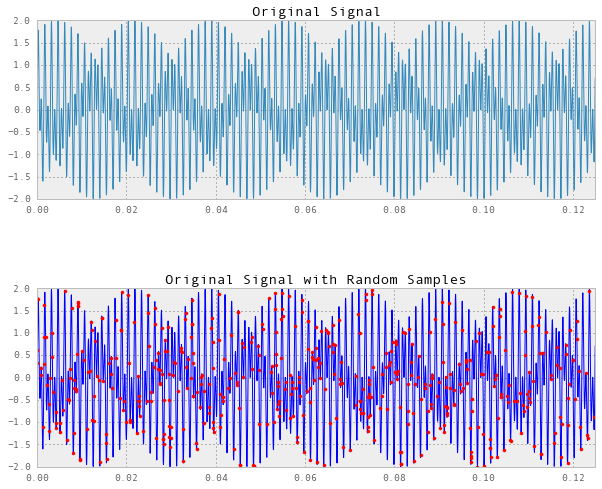

In [4]:
N = 5000
FS = 4e4
M = 500
f1, f2 = 697, 1336 # Pick any two touchtone frequencies
duration = 1./8
t = np.linspace(0, duration, duration*FS)
f = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
f = np.reshape(f, (len(f),1))

# Displaying the test signal
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(t,f)
plt.xlim(0, 0.125)
plt.title('Original Signal')


# Randomly sampling the test signal
k = np.random.randint(0,N,(M,))
k = np.sort(k) # making sure the random samples are monotonic
b = f[k]
plt.subplot(212), plt.plot(t,f,'b', t[k],b,'r.')
plt.xlim(0, 0.125)
plt.title('Original Signal with Random Samples')

3.99320208619e-05


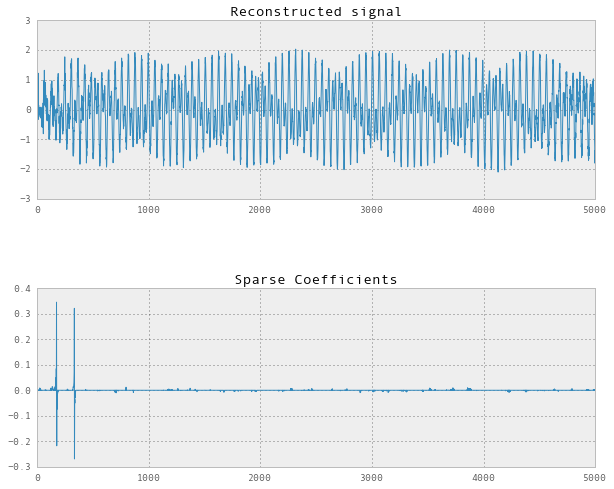

In [5]:
D = dct(np.eye(N), axis=0)
A = D[k,:]
lasso = Lasso(alpha=0.001)
lasso.fit(A, b)
print lasso.coef_.sum() / float(lasso.coef_.shape[0])
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(idct(lasso.coef_))
plt.title('Reconstructed signal')
plt.subplot(212), plt.plot(lasso.coef_)
plt.title('Sparse Coefficients')